In [1]:
def encode_text_dummy(df,name):
    dummies=pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name="{}-{}".format(name,x)
        df[dummy_name]=dummies[x]
    df.drop(name,axis=1,inplace=True)

In [4]:
import pandas as pd # to import csv and for data manipulation
#import matplotlib.pyplot as plt # to plot graph
#import seaborn as sns # for intractve graphs
from imblearn.over_sampling import SMOTE
import numpy as np # for linear algebra
import datetime # to dela with date and time
#import seaborn as sns
import numpy as np
#%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.model_selection import train_test_split # to split the data
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
#import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings



In [7]:
#conda install -c conda-forge imbalanced-learn
data = pd.read_csv("Train.csv",header = 0)
data.dropna(inplace=True,axis=1)
data.outcome[data.outcome==1]=0
data.outcome[data.outcome==2]=0
data.outcome[data.outcome==3]=0
data.outcome[data.outcome==4]=1
data.outcome[data.outcome==5]=0
data.head()
print(len(data.outcome[data.outcome==0]))
encode_text_dummy(data,'service')
encode_text_dummy(data,'flag')
encode_text_dummy(data,'protocol_type')


24984


C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher

In [8]:
def data_prepration(x): # preparing data for training and testing as we are going to use different data 
    #again and again so make a function
    x_features= x.ix[:,x.columns != "outcome"]
    x_labels=x.ix[:,x.columns=="outcome"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [9]:
os = SMOTE(random_state=0) #   We are using SMOTE as the function for oversampling
# now we can devided our data into training and test data
# Call our method data prepration on our dataset
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(data)
columns = data_train_X.columns

length of training data
17635
length of test data
7558


C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Code\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/us

In [11]:
os_data_X,os_data_y=os.fit_sample(data_train_X,data_train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["outcome"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of normal transcation in oversampled data",len(os_data_y[os_data_y["outcome"]==0]))
print("No.of fraud transcation",len(os_data_y[os_data_y["outcome"]==1]))
print("Proportion of Normal data in oversampled data is ",float(len(os_data_y[os_data_y["outcome"]==0]))/float(len(os_data_X)))
print("Proportion of fraud data in oversampled data is ",float(len(os_data_y[os_data_y["outcome"]==1]))/float(len(os_data_X)))

length of oversampled data is  34986
Number of normal transcation in oversampled data 17493
No.of fraud transcation 17493
Proportion of Normal data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


C:\Users\Code\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
os_data_X,data_test_X,os_data_y,data_test_y

(          duration     src_bytes  dst_bytes  land  wrong_fragment  urgent  \
 0         0.000000  0.000000e+00     0.0000   0.0             0.0     0.0   
 1         0.000000  8.000000e+00     0.0000   0.0             0.0     0.0   
 2         0.000000  2.240000e+02  7775.0000   0.0             0.0     0.0   
 3         0.000000  4.600000e+01    46.0000   0.0             0.0     0.0   
 4         0.000000  0.000000e+00     0.0000   0.0             0.0     0.0   
 ...            ...           ...        ...   ...             ...     ...   
 34981     0.000000  3.340000e+02     0.0000   0.0             0.0     0.0   
 34982  5057.289074  5.133876e+06     0.0000   0.0             0.0     0.0   
 34983     1.697400  1.248790e+03  2450.3948   0.0             0.0     0.0   
 34984     0.000000  3.340000e+02     0.0000   0.0             0.0     0.0   
 34985  5046.513585  5.133876e+06     0.0000   0.0             0.0     0.0   
 
              hot  num_failed_logins  logged_in  num_compromis

In [10]:
def data_prepration(x): # preparing data for training and testing as we are going to use different data 
    #again and again so make a function
    x_features= x.ix[:,x.columns != "outcome"]
    x_labels=x.ix[:,x.columns=="outcome"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [13]:
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(data)


length of training data
17635
length of test data
7558


C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Code\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/us

C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarni

Total Records: 11855
Normal 8970
Fraud 2885
% of Normal Record 75.6642766765078
% of Fraud Record 24.335723323492196


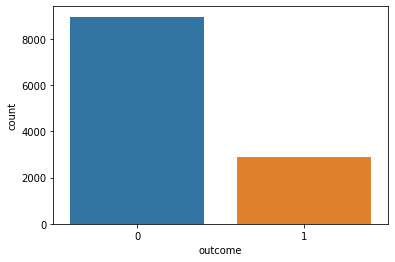

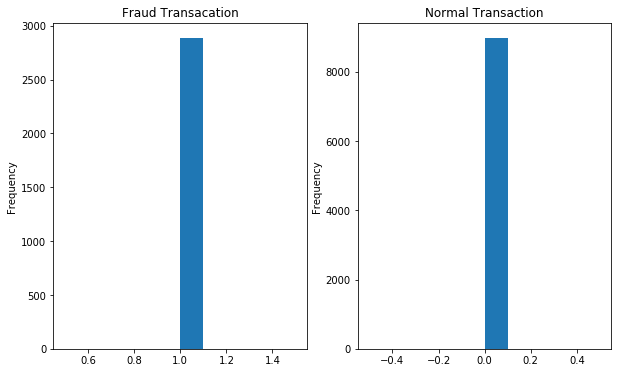

In [17]:
import seaborn as sns # for intractve graphs
import matplotlib.pyplot as plt # to plot graph
data1=pd.read_csv('Test.csv')
data1.dropna(inplace=True,axis=1)
data1.outcome[data1.outcome==1]=0
data1.outcome[data1.outcome==2]=0
data1.outcome[data1.outcome==3]=0
data1.outcome[data1.outcome==4]=1
data1.outcome[data1.outcome==5]=0


encode_text_dummy(data1,'service')
encode_text_dummy(data1,'protocol_type')
encode_text_dummy(data1,'flag')


sns.countplot("outcome",data=data1)
count_normal = len(data1[data1["outcome"]==0]) # normal transaction are repersented by 0
count_fraud = len(data1[data1["outcome"]==1]) # fraud by 1
total_record=count_normal+count_fraud
print('Total Records:',total_record)
print('Normal',count_normal)
print('Fraud',count_fraud)
print('% of Normal Record',float(count_normal)/float(total_record)*100)
print('% of Fraud Record',float(count_fraud)/float(total_record)*100)

#plot

Fraud_transacation = data1[data1["outcome"]==1]
Normal_transacation= data1[data1["outcome"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.outcome.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.outcome.plot.hist(title="Normal Transaction")

f=pd.concat([data1])
del f['outcome']

data1.head()
x = f.as_matrix()
y = data1['outcome'].as_matrix()


In [22]:
dt=DecisionTreeClassifier()
dt.fit(data_train_X,data_train_y)  
predictions= dt.predict(data_test_X)
t2=accuracy_score(data_test_y, predictions)*100
print("DT-Oversampling-Training Set- Accuracy is ", t2)
b= dt.predict(x)
print("DT-Oversampling-Test Set- Accuracy is ", accuracy_score(y, b)*100)

DT-Oversampling-Training Set- Accuracy is  99.77507277057423
DT-Oversampling-Test Set- Accuracy is  76.89582454660481


In [20]:
nw=MLPClassifier()
nw.fit(data_train_X,data_train_y)  
predictions= dt.predict(data_test_X)
t2=accuracy_score(data_test_y, predictions)*100
print("MLP-SMOTE-Training Set- Accuracy is ", t2)
b= nw.predict(x)
print("MLP-SMOTE-Test Set- Accuracy is ", accuracy_score(y, b)*100)

C:\Users\Code\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP-SMOTE-Training Set- Accuracy is  99.77507277057423
MLP-SMOTE-Test Set- Accuracy is  74.23028258118937


C:\Users\Code\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(data_train_X,data_train_y)  
predictions= dt.predict(data_test_X)
t2=accuracy_score(data_test_y, predictions)*100
print("KNN-SMOTE-Training Set- Accuracy is ", t2)
b= knn.predict(x)
print("KNN-SMOTE-Test Set- Accuracy is ", accuracy_score(y, b)*100)

C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNN-SMOTE-Training Set- Accuracy is  99.77507277057423
KNN-SMOTE-Test Set- Accuracy is  75.6642766765078
